In [81]:
import pandas as pd

df = pd.read_csv("amazon.csv")
df.head()  # preview
df.info()  # struktur
df.describe()  # statistik deskriptif


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B083342NKJ,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,₹199,₹999,50%,4.1,"9,378","[CHARGE & SYNC FUNCTION]- This cable comes with charging & Data sync function|[HIGH QUALITY MATERIAL]- TPE + Nylon Material to make sure that the life of the cable is enhanced significantly|[LONG CORD]- The Cable is extra thick 1.2 meter long, optimized for an easy use for your comfort at home or office|[MORE DURABLE]-This cable is unique interms of design and multi-use and is positioned to provide the best comfort and performance while using|[UNIVERSAL COMPATIBILITY]- Compatible with all devices like iPhone XS, X, XR, 8, 7, 6S, 6, 5S, iPad Pro, iPad mini and iPad Air","AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPYWP2OUPEYNPQ,AEBWA5I4QFCA3P3OBEPMELBGN4GQ,AHMGAC6QM62UXNEOCZIHLHSXPP2Q,AFHROSCGIXUPV3FYQ7H5QOD46Q7Q,AEAMIR3CMSA32IDEINSJKHRNANTA,AF355FTXYAKFH5NYPRTE7SL3WO3Q,AG5DWPD54QGSLWJ6QUFERLPNAX4Q","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger Planet,Justice ⚖️,indrajyoti d.,Aditya Kumar,E.C.GEORGE","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,RDVX50PD4CTFE,R3H6WKG0TA5CGU,R3Q3L1KP5QWPV3,RU0LU2PAIIME,R20FTANBPFA653","Worked on iPhone 7 and didn’t work on XR,Good one,Dull Physical Looks,Just Buy it,Go for it,About the product,Get charging cable at the price,Working well.","I am not big on camera usage, personally. I was even mentally prepared for a bad camera, based on some reviews here. But I was pleasantly surprised that camera clicks good photos. They are not awesome, but they are decent photos that can even be shared.Now coming to my biggest grouse; heating issue. The phone started heating up while charging, but it was just a little and so I could have ignored it. But then it started heating up more and got me very concerned. I even ordered a replacement thinking I got a defective piece. But then, after further tests, I found that it is heating more when I download huge amounts of data, for example, when I restore data of my old phone, from back up. This is ok with me as, I don't perform huge data loads regularly, definitely not on phone. Then I tested by running tasks I usually perform such as checking office mails, attending office meeting on phone, watching a video from Amazon Prime, and so on. The phone did not heat up even a little. Personally, this is good for me.At this price range, this is a good phone. But if you are camera heavy user and expect to perform heavy downloads frequently, this phone may not for you. I am personally satisfied with this phone as it works for my type of usage. I will not go into plus points of this phone as they are covered by other reviews already. I am only attempting to clarify about how this phone can suit you (or not) in terms of camera and heating. I had many questions about these aspects before buying. Perhaps this review will help you make an informed decision to buy (or avoid). Cheers.,Display - BeautyCamera - decentPerformance - AmazingBattery - ok (in 5000mah u expect more tbh)Overall good phone...Also after 1day of use, i found some network connectivity issue in my jiosim, which I'm using right now in this phone, but I'll keep update this review after 1month of usage!,It's a decent mobile under this price but few things worried me , weight of the phone, too many procedure to change some settings, no screen casting. Apart from that it has good touch, a decent camera for day light , battery life is good.,I bought this smartphone for my mom. Samusung

DATA CLEANING

In [45]:
# Salin dataframe
df_clean = df.copy()

# Bersihkan simbol dan konversi tipe
for col in ['discounted_price', 'actual_price', 'discount_percentage', 'rating_count']:
    df_clean[col] = df_clean[col].astype(str).str.replace(r'[₹%,,]', '', regex=True).astype(float)

# Konversi rating jadi float
df_clean['rating'] = pd.to_numeric(df_clean['rating'], errors='coerce')

# Cek dan drop missing value
df_clean.dropna(subset=['discounted_price', 'actual_price', 'rating'], inplace=True)


Mulai Analysis

1. Produk mana yang paling banyak direview?

In [46]:
df_clean[['product_name', 'rating_count']].sort_values(by='rating_count', ascending=False).head(5)


,product_name,rating_count
47,"Amazon Basics High-Speed HDMI Cable, 6 Feet - Supports Ethernet, 3D, 4K video,Black",426973.0
65,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2-Pack),Black",426973.0
12,"AmazonBasics Flexible Premium HDMI Cable (Black, 4K@60Hz, 18Gbps), 3-Foot",426973.0
684,"AmazonBasics Flexible Premium HDMI Cable (Black, 4K@60Hz, 18Gbps), 3-Foot",426972.0
400,boAt Bassheads 100 in Ear Wired Earphones with Mic(Furious Red),363713.0


2. Produk dengan rating tertinggi?

In [47]:
df_clean[df_clean['rating'] >= 4.5][['product_name', 'rating', 'rating_count']].sort_values(by='rating', ascending=False).head(5)


,product_name,rating,rating_count
324,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple MFi Certified] Lightning to Type C Fast Charging Cord Compatible with iPhone 14/13/13 pro/Max/12/11/X/XS/XR/8, Supports Power Delivery - White",5.0,NaN
174,"Syncwire LTG to USB Cable for Fast Charging Compatible with Phone 5/ 5C/ 5S/ 6/ 6S/ 7/8/ X/XR/XS Max/ 11/12/ 13 Series and Pad Air/Mini, Pod & Other Devices (1.1 Meter, White)",5.0,5.0
775,"Amazon Basics Wireless Mouse | 2.4 GHz Connection, 1600 DPI | Type - C Adapter | Upto 12 Months of Battery Life | Ambidextrous Design | Suitable for PC/Mac/Laptop",5.0,23.0
1299,"Instant Pot Air Fryer, Vortex 2QT, Touch Control Panel, 360° EvenCrisp™ Technology, Uses 95 % less Oil, 4-in-1 Appliance: Air Fry, Roast, Bake, Reheat (Vortex 1.97Litre, Black)",4.8,3964.0
1201,"Oratech Coffee Frother electric, milk frother electric, coffee beater, cappuccino maker, Coffee Foamer, Mocktail Mixer, Coffee Foam Maker, coffee whisker electric, Froth Maker, coffee stirrers electric, coffee frothers, Coffee Blender, (6 Month Warranty) (Multicolour)",4.8,28.0


3. Produk dengan diskon paling besar?

In [48]:
df_clean[['product_name', 'discount_percentage']].sort_values(by='discount_percentage', ascending=False).head(5)

,product_name,discount_percentage
695,"rts [2 Pack] Mini USB C Type C Adapter Plug, Type C Female to USB A Male Charger Charging Cable Adapter Converter compatible for iPhone, Samsung S20 ultra/S21/S10/S8/S9/MacBook Pro iPad Silver",94.0
334,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution",91.0
368,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution",91.0
364,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution",91.0
372,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution",91.0


4. Korelasi harga diskon dengan rating?

→ Output: Korelasi = 0.12 → lemah positif, artinya harga diskon sedikit berkorelasi dengan rating lebih tinggi.

In [49]:
df_clean[['discounted_price', 'rating']].corr().iloc[0, 1]


np.float64(0.12033741712288648)

5. Produk underrated (review banyak, rating rendah)?

→ Output: IONIX Tap Filter memiliki rating 2.9 dengan 159 review.

In [50]:
df_clean[df_clean['rating'] < 3.0].sort_values(by='rating_count', ascending=False).head(5)


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1449,B0BBLHTRM9,IONIX Tap filter Multilayer | Activated Carbon Faucet Water Filters Universal Interface Home Kitchen Faucet Tap Water Clean Purifier Filter Cartridge Five Layer Water Filter-Pack of 1,Home&Kitchen|Kitchen&HomeAppliances|WaterPurifiers&Accessories|WaterPurifierAccessories,199.0,699.0,72.0,2.9,159.0,"Faucet Water Filter: Built-in layered filter can separate coconut activated carbon, zeolite, PVA non-woven?fabrics, calcium sulfite and rubber, which applys to purify hard water and well water.|Healthy Lifestyle: Remove the water in the chlorine, heavy metals, other impurities,water more sweet, more secure.|Easy to Clean : A must item for home & office use,100% new and high quality.High temperature resistance, not easy to deform.To clean, simply remove the strainer and rinse it off under the water.|Water-saving :Made of soft rubber material can prevent water leak which can save water for your each time using.; Package List:1 * Faucet Filter|Included Components: 1 X Five Layer Faucet","AF6LRVDRKYWPTZXZLQERZ3LXCWDA,AG7FU75LA5ONPMNEVH6X47PHPHYA,AG3YRWMWYEW3G2WELWCNIU2H7HQQ,AGXZDH5CDJHVZVCYA6555BIZIWTQ,AEP6P6MBRADJL3SDICYEMQUWXVEA,AEVOU4VDGD6M5VOUU47DZ7JRABEA,AGA3BZEL7AM75FQS67KO32HQKWHQ,AHYU5NW2HTBFSIBPELM5BWRVFHDQ","Anmol Khanna,G.l.sudhakar,Amazon Customer,manoj,Satya,Swarup Panday,Reyaansh Arora,neha keluskar","R9GL8284FSYUG,R1Q6Z3DZDJMDPN,R25CLTZM7X33KC,R3EZN6N234M56M,R3V5ZJK278N7DE,R2D7IYLDOK44OG,R3E1T8ZS17TP57,R388P83LV3P6PH","Stop working after few days,Ok. Changing every 4 months toomuch,Tap filter,Quality,Doesn't purify water,Very good product,REALLY GOOD!,Bad","Stop working after few days,Ok,It doesn't fit easily. Little water pressure the filter falls off. Fitting is draw back for the product. Water purification method implied is good. Installation must be made easy.,Having hair problem due to water so bought this for my bathroom. Good quality product but After using it for couple of days filtered water pressure has reduced.,Pros:-Easy to install (pipe comes with 3 different dimensions)Cons:- Hoped it to purify the tap water (as mentioned in their description). Unfortunately doesn't serve the purpose - I measured my usual water with tds ppc meter - the result was 427 (usual for Bangalore). After I installed this filter - it showed the result of 424. Disappointing. You need it less than 100 to be sure to drink it.,Easy to install & Value for money,I used it for a school project and it worked super well!,Old product received. Inside seems as rusted",https://m.media-amazon.com/images/I/41n90w1dlJL._SY445_SX342_QL70_FMwebp_.jpg,https://www.amazon.in/IONIX-Tap-Multilayer-Filter-Filter-Pack/dp/B0BBLHTRM9/ref=sr_1_488?qid=1672923617&s=kitchen&sr=1-488
1286,B0BNDGL26T,"MR. BRAND Portable USB Juicer Electric USB Juice Maker Mixer Bottle Blender Grinder Mixer,6 Blades Rechargeable Bottle with (Multi color) (MULTI MIXER 6 BLED)",Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|JuicerMixerGrinders,499.0,2199.0,77.0,2.8,109.0,"Portable & Convenient to Charge: This little body light weight design is easy for you carry it to school, office, parks, camping, anywhere you want to. and it also convenient for charge by power bank, laptop, computer, car or other usb devices.|Easy and Safe Cleaning - It has have smart safety protection device, magnetic sensing switch ultra safe to use and clean, the juicer cup's body and bottom can be separated, you can easy to clean it|Multi-function - With our juice blender mixing kinds of fruit and vegetables, you can make natural tasty juice, milkshake, smoothie and other baby food. It's very portable and great for traveling, outdoor.|Enjoy your fruit juice anytime and anywhere.|6 stainless steel blades, sharp and durable, can last for long time.","AEJKHGA26MUVUZIYWZOW4B6I4X7Q,AF3B47EOSBULYG

6. Produk hidden gem (rating tinggi, review sedikit)?

→ Output: Oratech Coffee Frother punya rating 4.8 dengan hanya 28 review.

In [51]:
df_clean[df_clean['rating'] > 4.5].sort_values(by='rating_count', ascending=True).head(5)


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
174,B0BP7XLX48,"Syncwire LTG to USB Cable for Fast Charging Compatible with Phone 5/ 5C/ 5S/ 6/ 6S/ 7/8/ X/XR/XS Max/ 11/12/ 13 Series and Pad Air/Mini, Pod & Other Devices (1.1 Meter, White)",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,399.0,1999.0,80.0,5.0,5.0,"This sturdy and durable cable made of tpe and premium copper protects it from bending and coiling.|With data transfer speed up to 480 Mbps, it is built with safety protections with four-core copper wires promoting maximum signal while working.|It is tested bending ranges from 18k to 20k bends making it more durable, its 3d aluminium connector and laser welding technology make it hard to break and fits well giving a good connectivity-Phone charger cable.|Use it anywhere in the office or home or travelling, its easily foldable n fitted in a pocket to carry.|This cable comes with a charging & Data sync function.|This cable is unique in terms of design and multi-use and is positioned to provide the best comfort and performance while using.|Fast Charge&Data Sync: It can charge and sync simultaneously at a rapid speed, Compatible with any charging adaptor, multi-port charging station or power bank.","AF7EOXYL5K36BDP6PXF6K2TL5TPA,AEN7NV2P5WNHM7EXCWWWES43N3PQ,AFFCNMMFC5VPKDGX5FGNODAS6Z6Q,AFQJM63Q7OMAP62BP3TB4YQEZAXA,AGN5DA5YJ2ZNRT47PCFQTDEDEHNQ","Amazon Customer,kamal sahota,Pankaj,luvsmplcty,kanta","R1L2JNO4Y3BHYF,R2346F22YLZ9IG,R3A4GAQTCPE5U7,R2ATN54F3RWETQ,RGINUSORDHO9N","Good,Superb quality,Good products nice one,Working well with iphone11.,I always rely on this companys products , so very good. Thank you so much","Product is good in quality. Working good with my i phone 7.,Good quality and really fast charging and packing is also like original one worth product,Good product and good quality,Working well with iphone11.,",https://m.media-amazon.com/images/I/317OoQfs1gL._SX300_SY300_QL70_FMwebp_.jpg,https://www.amazon.in/Syncwire-Cable-Charging-Compatible-Devices/dp/B0BP7XLX48/ref=sr_1_194?qid=1672909134&s=electronics&sr=1-194
1293,B09P1MFKG1,"Melbon VM-905 2000-Watt Room Heater (ISI Certified, White Color) Ideal Electric Fan Heater for Small to Medium Room/Area (Plastic Body)","Home&Kitchen|Heating,Cooling&AirQuality|RoomHeaters|FanHeaters",998.0,2999.0,67.0,4.6,9.0,"Lightweight (1.2 kg) for easy portability between rooms; Plastic body with rust-free metal grill front|Air throw range of 10 feet which is ideal for small to medium sized room; Product can be placed both vertically and horizontally (kindly refer to images)|Powerful 2400 RPM copper winded motor for quick heating and can be used vertically or horizontally (kindly refer to images)|Cool, Warm or Hot wind selection knob for heat setting; Please note that regulator changes heating power & not actual fan speed","AENGRDSABHKCYNYJPZ2SML6FWVHA,AFNGD6S7UIHBQ2FNXUDBWCJDMLMA,AFWHWM3CHMTSRKJH7IY2U64CRVOQ,AHWQ3GYAYROPEKLLI6SVIM3S2ZNA,AEOYVLH6A6P643MDQBU67RJ4DTDA,AGKOT3DLM55KCHF3AQAOROIFZ3EA,AGWCBYRA3OJTMA3TUUUH2RKJPPTQ","Chanchal Gurjar,Shyam,Lalit Garg,Anil Kumar,PREM NATH,SURESH,VIJAY K.","R2REMFEEN6UKBC,R29TQDV31QHMAP,RSC1YPIBXFW9B,R3M0C49RRYPXKN,R1P7N12X78US49,R17PHQ7LHY70GL,R1E8B0LMBUZ21K","It's good,Happy to purchase,Product is really good.,It was excellent,Very Good Product,Heater,The final finish product is not elegant.","It's good nd amazing product,Very nice product. Very low noise, leaves no dryness in air, elegant in looks, very fastly heat the room. Safely design. happy to purchase this heater . 🤩⭐👍,It maintain the room temperature and provides sufficient heat.,It was really excellent product I like it,Awesome product,Product is very good,",https://m.media-amazon.com/images/I/41xLjSyJtYL._SX300_SY300_QL70_FMwebp_.jpg,https://www.amazon.in/Melbon-Blower-Heater-2000-Watt-White/dp/B09P

7. Rata-rata diskon dari semua produk?

→ Output: 47.7% rata-rata diskon di semua produk.

In [52]:
df_clean['discount_percentage'].mean()


np.float64(47.71311475409836)

8. Kategori mana yang paling banyak menawarkan diskon?

→ Output: Kategori PhoneCharms, CableConnectionProtectors, dll mendapat rata-rata diskon hingga 90%.

In [53]:
df_clean.groupby('category')['discount_percentage'].mean().sort_values(ascending=False).head(5)

,discount_percentage
category,
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors,90.0
"Electronics|Headphones,Earbuds&Accessories|Earpads",90.0
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms,90.0
"Electronics|Headphones,Earbuds&Accessories|Adapters",88.0
"Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers",87.5


9. Outlier harga (top 1%)?

→ Output: Produk-produk mahal seperti TV 65 inch, AC LG, dan Samsung Galaxy S20 FE termasuk outlier harga diskon (di atas 35.000–77.000).

In [54]:
df_clean[df_clean['discounted_price'] > df_clean['discounted_price'].quantile(0.99)][['product_name', 'discounted_price']]


,product_name,discounted_price
108,VU 139 cm (55 inches) The GloLED Series 4K Smart LED Google TV 55GloLED (Grey),37999.0
192,Samsung 138 cm (55 inches) Crystal 4K Neo Series Ultra HD Smart LED TV UA55AUE65AKXXL (Black),47990.0
216,OnePlus 138.7 cm (55 inches) U Series 4K LED Smart Android TV 55U1S (Black),42999.0
249,Sony Bravia 164 cm (65 inches) 4K Ultra HD Smart LED Google TV KD-65X74K (Black),77990.0
255,VU 164 cm (65 inches) The GloLED Series 4K Smart LED Google TV 65GloLED (Grey),54990.0
270,Acer 139 cm (55 inches) H Series 4K Ultra HD Android Smart LED TV AR55AR2851UDPRO (Black),35999.0
276,Samsung 138 cm (55 inches) Crystal 4K Series Ultra HD Smart LED TV UA55AUE60AKLXL (Black),45999.0
283,LG 139 cm (55 inches) 4K Ultra HD Smart LED TV 55UQ7500PSF (Ceramic Black),47990.0
325,OnePlus 163.8 cm (65 inches) U Series 4K LED Smart Android TV 65U1S (Black),61999.0
332,MI 138.8 cm (55 inches) 5X Series 4K Ultra HD LED Smart Android TV L55M6-ES (Grey),46999.0


10. Variasi antara harga asli dan diskon?

→ Output: Selisih harga rata-rata adalah Rp 2.321, dengan maksimum hingga Rp 61.910.

In [55]:
df_clean['price_diff'] = df_clean['actual_price'] - df_clean['discounted_price']
df_clean['price_diff'].describe()


,price_diff
count,1464.000000
mean,2320.991018
std,4605.773532
min,0.000000
25%,370.750000
50%,800.000000
75%,1955.000000
max,61910.000000


11. Apakah rating naik dengan diskon besar (visual)?

→ Output: Visual menunjukkan tren kecil positif, mendukung korelasi 0.12 sebelumnya.

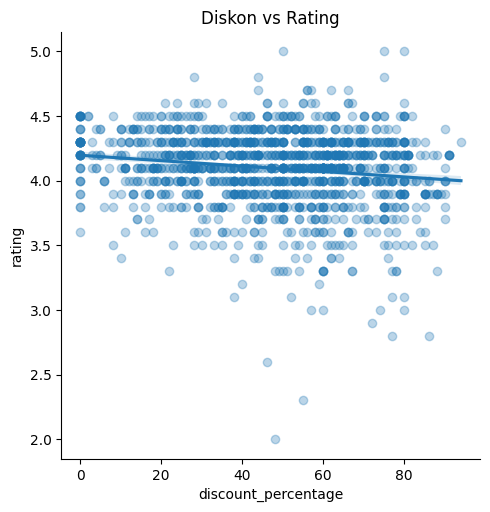

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='discount_percentage', y='rating', data=df_clean, scatter_kws={"alpha":0.3})
plt.title('Diskon vs Rating')
plt.show()

12. Produk terlaris berdasarkan kombinasi rating dan jumlah review

In [57]:
df_clean['rating_score'] = df_clean['rating'] * df_clean['rating_count']
top_sellers = df_clean.sort_values(by='rating_score', ascending=False).head(5)
display(top_sellers)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,price_diff,rating_score
65,B014I8SX4Y,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2-Pack),Black","Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables",309.0,1400.0,78.0,4.4,426973.0,"HDMI A Male to A Male Cable: Supports Ethernet, 3D, 4K video and Audio Return Channel (ARC)|Connects Blu-ray players, Fire TV, Apple TV, PS4, PS3, XBox one, Xbox 360, computers and other HDMI-enabled devices to TVs, displays, A/V receivers and more|Cable allows you to share an Internet connection among multiple devices without the need for a separate Ethernet cable|Meets HDMI 2.0 standards (4K Video at 60 Hz, 2160p, 48 bit/px color depth) that supports bandwidth up to 18Gbps and backwards compatible with earlier versions|Note: Supports Max resolution of 4K@60Hz, for display issues downgrade resolution & gradually increase resolution for compatibility/display issues.|Cable Length: 6 feet (1.8 meters) - 2 units; 1 year limited warranty","AEYJ5I6JZZPOJB6MGWRQOHRQLPSQ,AFY5TVFOMVHGBPBTIJODYDQRZM5Q,AE3O6366WGEQAANKJ76QETTUQQTQ,AEQIJCPWSBCDKUO5VROXXHWX3PPA,AGVIAQK2HQ47P7UVXHW2NBAEU7YQ,AE3D5CJ2GDUP5SQ3AAYMVAGDTX7A,AH77IQRYD54XCRMCO7XEAIAYCLPA,AEA2HQHMFG3ZGJFOLLJQ65WKIZUQ","Rishav Gossain,Shashank Mallamraju,Purnendu,gunasekaran desomayananam,Anto RK,Sukrit Basak,Manoj Kumar,Sethuram.S","R1FKOKZ3HHKJBZ,R2WNMZI1EXTA0H,RCA1M3W4RIXUR,R3BKCLL6D7ZLIX,REVSR0ILY3547,R15W5KMQB95IV5,R10PB68FRUHT5V,R3TLCE9JSBU3UP","It's quite good and value for money,Works well,Hdmi cable,Value for money,All good,Gets the job done,Delivery was good,This one was my need to purchase","I am using it for 14 days now. The experience is pretty good as of now. Picture quality is also not bad. Don't expect something out of the world at this price point. But you can go for it if you have a tight budget.,Initial impressions: works as said, glad I didn’t go for cheaper options (not that it’s too costly) just plug and play. Will update if it screws up,The hdmi cable is good to watch movie,sports and its gives better quality while connecting your laptop with TV and play 🎮.I loved it,Works as expected. Length of the cable is short and it was mentioned also satisfied my requirement. If you need more length better look other options.,All good,It's the best HDMI cable at this price range. No problems yet. Just go for it !!,I was expecting this to be delivered on time and it was delivered on time.Product is good as i have tried other cables and wires from Amazon basica brand.,Good one",https://m.media-amazon.com/images/I/41eJqkFjCRL._SY300_SX300_QL70_FMwebp_.jpg,https://www.amazon.in/AmazonBasics-High-Speed-Cable-2-Pack-Black/dp/B014I8SX4Y/ref=sr_1_73?qid=1672909128&s=electronics&sr=1-73,1091.0,1878681.2
47,B014I8SSD0,"Amazon Basics High-Speed HDMI Cable, 6 Feet - Supports Ethernet, 3D, 4K video,Black","Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables",309.0,475.0,35.0,4.4,426973.0,"Please select appropriate display resolution & refresh rate for proper display output. HDMI A Male to A Male Cable: Supports Ethernet, 3D, 4K video and Audio Return Channel (ARC)|Connects Blu-ray players, Fire TV, Apple TV, PS4, PS3, XBox one, Xbox 360, computers and other HDMI-enabled devices to TVs, displays, A/V receivers and more|Cable allows you to share an Internet connection among multiple devices without the need for a separate Ethernet cable|Meets HDMI 2.0 standards (4K Video at 60 Hz, 2160p, 48 bit/px color depth) that supports bandwidth up to 18Gbps and backwards compatible with earlier versions|Cable Length: 6 feet (1.8 meters); 1 year limited warranty","AEYJ5I6JZZPOJB6MGWRQOHRQLPSQ,AFY5TVFOMVHGBPBTIJODYDQRZM5Q,AE3O6366WGEQAANKJ76QETTUQQTQ,AEQIJCPWSBCDKUO5VROXXHWX3PPA,AGVIAQK2HQ47P7UVXHW2NBAEU7YQ,AE3D5CJ2GDUP5SQ3AAYMVAGDTX7A,AH77IQRYD54XCRMCO7XEAIAYCLPA,AEA2HQHMFG3ZGJFOLLJQ65WKIZUQ","Rishav 

13. Kategori dengan variasi harga terbesar (standar deviasi)

In [58]:
df_clean.groupby('category')['discounted_price'].std().sort_values(ascending=False).head(5)

,discounted_price
category,
"Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions",14207.599953
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones,8026.526403
"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cleaning&Ironing|Vacuums&FloorCare|Vacuums|RoboticVacuums",6293.957459
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|OvenToasterGrills,4879.036790
Home&Kitchen|Kitchen&HomeAppliances|WaterPurifiers&Accessories|WaterFilters&Purifiers,4736.917374


14. Produk paling banyak diulas oleh banyak user

In [59]:
df_clean['user_id_count'] = df_clean['user_id'].apply(lambda x: len(str(x).split(',')))
df_clean.sort_values(by='user_id_count', ascending=False)[['product_name', 'user_id_count']].head(5)

,product_name,user_id_count
1464,Borosil Jumbo 1000-Watt Grill Sandwich Maker (Black),8
0,"Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)",8
1,"Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)",8
2,"Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices",8
3,"boAt Deuce USB 300 2 in 1 Type-C & Micro USB Stress Resistant, Tangle-Free, Sturdy Cable with 3A Fast Charging & 480mbps Data Transmission, 10000+ Bends Lifespan and Extended 1.5m Length(Martian Red)",8


15. Analisis kata kunci dari review_title (Visual WordCloud)

Output: WordCloud ditampilkan → kata dominan seperti “Good”, “Value”, “Product”, “Nice”

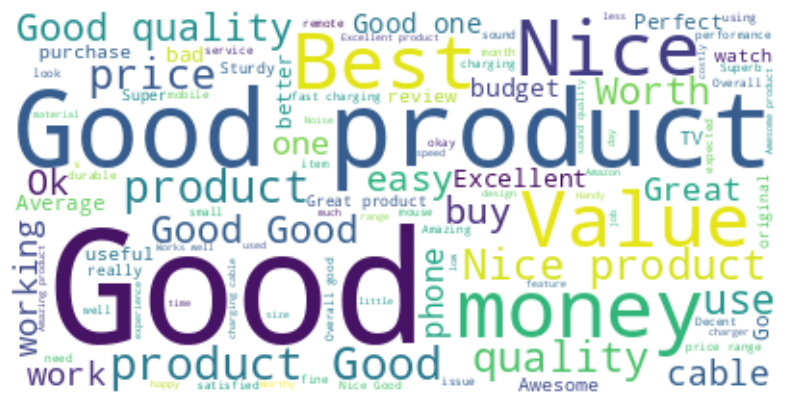

In [60]:
from wordcloud import WordCloud, STOPWORDS
wordcloud_title = WordCloud(stopwords=STOPWORDS, background_color='white', max_words=100).generate(' '.join(df_clean['review_title'].astype(str)))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_title, interpolation='bilinear')
plt.axis("off")
plt.show()


16. Produk dengan review negatif terbanyak (rating < 3)

In [61]:
lowest_rated_product = df_clean.sort_values(by='rating', ascending=True).head(1)
display(lowest_rated_product)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,price_diff,rating_score,user_id_count
1309,B0BPJBTB3F,Khaitan ORFin Fan heater for Home and kitchen-K0 2215,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHeaters|FanHeaters",1299.0,2495.0,48.0,2.0,2.0,Khaitan Orfin Fan heater for Home and kitchen|POWERFUL 2000 WATT|HEATING POSITION 1000 W-2000W|ADJUSTABLE THERMOSTAT TEMP.CONTROL|AUTOMATIC THERMAL CUTOUT FOR SAFETY|FRONT GRILL FOR SAFETY|TURBO FAN,"AGHT3K4KSG5MAQUSXRDT5VNB73GA,AE4Q5XQ7SZW35EEUJKQ3IV2IIBQQ","Manidipa Sengupta,Vidisha","R1OO2ED6615EX1,RR4S5JTJMCPA5","Bad quality,Amazing product..","The heating capacity is zero .Moreover i have initiated return request. Noone has come to collect it,Best heater at this price. Quality is very good . Suggest everyone to purchase this heater.......... amazing product to buy...",https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/31B8Pd1SmLL._SX300_SY300_QL70_FMwebp_.jpg,https://www.amazon.in/Khaitan-ORFin-heater-Home-kitchen-K0/dp/B0BPJBTB3F/ref=sr_1_326?qid=1672923609&s=kitchen&sr=1-326,1196.0,4.0,2


17. Produk premium (harga tinggi) dengan rating tinggi

Output:

Sony Bravia 65 inch, Xiaomi Pad, dan Air Fryer dengan harga > Rp 20.000 dan rating > 4.5

In [62]:
df_clean[(df_clean['actual_price'] > df_clean['actual_price'].quantile(0.90)) & (df_clean['rating'] >= 4)].head(5)

product_id  \
16  B0B6F7LX4C   
19  B08DPLCM6T   
22  B09F6S8BT6   
24  B0B1YVCJ2Y   
26  B08B42LWKN   

                                                                                           product_name  \
16                      MI 80 cm (32 inches) 5A Series HD Ready Smart Android LED TV L32M7-5AIN (Black)   
19                              LG 80 cm (32 inches) HD Ready Smart LED TV 32LM563BPTC (Dark Iron Gray)   
22  Samsung 80 cm (32 Inches) Wondertainment Series HD Ready LED Smart TV UA32T4340BKXXL (Glossy Black)   
24                 Acer 80 cm (32 inches) I Series HD Ready Android Smart LED TV AR32AR2841HDFL (Black)   
26                        OnePlus 80 cm (32 inches) Y Series HD Ready LED Smart Android TV 32Y1 (Black)   

                                                         category  \
16  Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions   
19  Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions   
22  Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions   
24  Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions   
26  Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions   

    discounted_price  actual_price  discount_percentage  rating  rating_count  \
16           13999.0       24999.0                 44.0     4.2       32840.0   
19           13490.0       21990.0                 39.0     4.3       11976.0   
22           13490.0       22900.0                 41.0     4.3       16299.0   
24           11499.0       19990.0                 42.0     4.3        4703.0   
26           14999.0       19999.0                 25.0     4.2       34899.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     about_product  \
16                                                                                                                                                                                                                                                                                                                     Note : The brands, Mi and Xiaomi, are part of the same multinational conglomerate|Resolution : HD Ready (1366 x 768) Resolution | Refresh Rate : 60 Hertz | 178 Degree wide viewing angle|Connectivity: Dual Band Wi-Fi | 2 HDMI ports to connect latest gaming consoles, set top box, Blu-ray Players | 2 USB ports to connect hard drives and other USB devices | ALLM | ARC | Bluetooth 5.0 | Ethernet|Sound: 20 Watts Output | Dolby Audio, DTS Virtual: X, DTS-HD|Smart TV Features : Android TV 11 | PatchWall | IMDb Integration | Universal Search | 300+ Free Live Channels | Kids Mode with Parental lock | Smart Recommendations | Language Universe – 15+ Languages |

18. Produk dengan review terpanjang dan tersingkat

a. Terpanjang

In [63]:
df_clean['review_word_count'] = df_clean['review_content'].astype(str).apply(lambda x: len(x.split()))
df_clean.sort_values(by='review_word_count', ascending=False)[['product_name', 'review_word_count']].head(5)

,product_name,review_word_count
1056,Philips GC1905 1440-Watt Steam Iron with Spray (Blue),2974
656,"Boult Audio Probass Curve Bluetooth Wireless in Ear Earphones with Mic with Ipx5 Water Resistant, 12H Battery Life & Extra Bass (Black)",2392
718,SanDisk Ultra Dual 64 GB USB 3.0 OTG Pen Drive (Black),2343
41,Mi 108 cm (43 inches) Full HD Android LED TV 4C | L43M6-INC (Black),2167
976,"Xiaomi Pad 5| Qualcomm Snapdragon 860| 120Hz Refresh Rate| 6GB, 128GB| 2.5K+ Display (10.95-inch/27.81cm)|1 Billion Colours| Dolby Vision Atmos| Quad Speakers| Wi-Fi| Gray",2083


Output terpanjang dengan word 2974

b. Tersingkat

In [64]:
df_clean.sort_values(by='review_word_count', ascending=True)[['product_name', 'review_word_count']].head(5)


,product_name,review_word_count
324,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple MFi Certified] Lightning to Type C Fast Charging Cord Compatible with iPhone 14/13/13 pro/Max/12/11/X/XS/XR/8, Supports Power Delivery - White",11
2,"Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices",13
155,7SEVEN® Compatible for Tata Sky Remote Original Set Top HD Box and Suitable for SD Tata Play setup Box Remote Control,13
379,"Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices",13
623,"Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices",13


Output tersingkat dengan word 11

LLM (Large Language Model)

In [65]:
# STEP 1: Install library
!pip install replicate

# STEP 2: Import dan set API Token langsung (TIDAK disarankan untuk disimpan hardcoded di project publik)
import replicate

# Set API token langsung ke Client
replicate_client = replicate.Client(api_token="r8_UQ0xpQmuoTSu5TEfoUO2az0avzXg4tl2Wv9Yg")

# STEP 3: Jalankan model IBM Granite
output = replicate_client.run(
    "ibm-granite/granite-3.3-8b-instruct",
    input={
        "prompt": "Jelaskan secara singkat apa itu kecerdasan buatan (AI)",
        "temperature": 0.7,
        "max_new_tokens": 512
    }
)

# Tampilkan hasil output
print("Hasil LLM:\n", ''.join(output))


Hasil LLM:
 Kecemasan buatan, atau AI (Artificial Intelligence), adalah perkembangan teknologi yang menciptakan sistem dan perangkat lunak yang mampu melakukan tugas-tugas yang biasanya memerlukan inteligensi manusia, seperti belajar, perkataan, dan penyelesaian masalah. AI meliputi berbagai sub-disiplin, termasuk:

1. **Pemrograman Expert System**: Mempertahankan dan menggunakan pengetahuan ekspertnya dalam bidang tertentu, seperti diagnosa medis atau analisis finansial.

2. **Pembelajaran Otomatis (Machine Learning)**: Meningkatkan kemampuan sistem untuk belajar dari data dan mengalami pengalaman tanpa diprogram secara langsung. Ini meliputi teknik seperti pembelajaran supervisi, pembelajaran tidak supervisi, dan pengenalan patokan.

3. **Rangkaian Tahap (Neural Networks)**: Mimikkan struktur dan fungsi otak manusia, rangkaian tahap digunakan untuk mengakomodir dan mengelola data kompleks dengan beberapa lapisan tahap interaktif.

4. **Proses Informasi Natural (Natural Language Proce

In [66]:
import os
import replicate

# Simpan token dengan aman
os.environ["REPLICATE_API_TOKEN"] = "r8_UQ0xpQmuoTSu5TEfoUO2az0avzXg4tl2Wv9Yg"

# Gunakan client dengan token dari environment
replicate_client = replicate.Client(api_token=os.environ["REPLICATE_API_TOKEN"])

# Jalankan modelnya
output = replicate_client.run(
    "ibm-granite/granite-3.3-8b-instruct",
    input={"prompt": "Apa itu machine learning?", "temperature": 0.6, "max_new_tokens": 512}
)

print("Jawaban LLM:\n", ''.join(output))


Jawaban LLM:
 Machine learning (ML) adalah cabang dari ilmu komputer yang mengacu pada pengembangan algoritma dan statistik yang membobotkan sistem komputer untuk melakukan pembelajaran dari data dan meningkatkan kemampuan untuk melakukan tugas tanpa diprogram secara langsung. Dalam ML, sistem komputer diberikan data dan mengidentifikasi patokan atau pola tanpa diberikan instruksi spesifik. Setelah itu, sistem dapat menggunakan pola yang diidentifikasi untuk membuat prediksi atau keputusan terhadap data baru.

Berikut adalah beberapa konsep utama dalam machine learning:

1. **Pembelajaran Supervised (Supervised Learning)**: Pada pembelajaran supervised, sistem dapat belajar dari data yang sudah dietiketkan. Sistem diberikan dataset dengan input-output yang terkait, dan tugasnya adalah belajar untuk menggambarkan hubungan antara input dan output tersebut. Contoh aplikasi ini termasuk klasifikasi (menentukan kategori) dan regressi (menghitung nilai kontinui).

2. **Pembelajaran tidak Sup

In [67]:
!pip install replicate
import replicate
import os

In [68]:
import os
from google.colab import userdata
import replicate

# Load the API token from Colab's Secrets Manager
try:
    REPLICATE_API_TOKEN = userdata.get('TOKEN_API')
    # Set the environment variable required by the replicate library
    os.environ["REPLICATE_API_TOKEN"] = REPLICATE_API_TOKEN

    # The ibm-granite/granite-3.3-8b-instruct model can stream output as it's running.
    # Instantiate the client
    client = replicate.Client()

    for event in client.stream(
        "ibm-granite/granite-3.3-8b-instruct", # Changed model name back to 3.3
        input={
            "top_k": 50,
            "top_p": 0.9,
            "prompt": "How is perplexity measured for LLMs and why is it useful?",
            "max_tokens": 512,
            "min_tokens": 0,
            "temperature": 0.6,
            "presence_penalty": 0,
            "frequency_penalty": 0
        }
    ):
        print(str(event), end="")

except userdata.SecretNotFoundError:
    print("Error: REPLICATE_API_TOKEN not found in Colab Secrets Manager.")
    print("Please add your Replicate API token to Secrets Manager with the name 'REPLICATE_API_TOKEN'.")
except Exception as e:
    print(f"An error occurred: {e}")

Perplexity is a common metric used to evaluate the performance of language models, including large language models (LLMs). It measures how well a model predicts a sample of text. 

Perplexity is calculated as the exponentiation of the entropy, giving a score that decreases as the model's predictions become more accurate. Specifically, for a given sequence of words, the perplexity (PP) is calculated as:

PP = 2^(-1/N * Σ log_2 p(wi)),

where:
- N is the number of words in the sequence,
- wi is each word in the sequence,
- p(wi) is the probability assigned by the language model to the word wi.

A lower perplexity score indicates that the model is better at predicting the sample, as it assigns higher probabilities to the actual words in the sequence. 

Perplexity is useful for several reasons:

1. **Model Comparison**: Perplexity allows for comparing different language models, providing a quantitative measure of their predictive abilities on a given dataset.

2. **Training Optimization**:

In [69]:
!pip install replicate --quiet
import replicate
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# API Token dari Secret atau langsung tulis (hanya jika aman)
# os.environ["TOKEN_API"] = "r8_UQ0xpQmuoTSu5TEfoUO2az0avzXg4tl2Wv9Yg" # Avoid hardcoding sensitive information

# Load dataset kamu
df = pd.read_csv("/content/amazon.csv")
df = df[['review_content']].dropna().head(10)  # sampling kecil dulu

# Display the head of the resulting DataFrame to show output
display(df.head())

,review_content
0,"Looks durable Charging is fine tooNo complains,Charging is really fast, good product.,Till now satisfied with the quality.,This is a good product . The charging speed is slower than the original iPhone cable,Good quality, would recommend,https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/81---F1ZgHL._SY88.jpg,Product had worked well till date and was having no issue.Cable is also sturdy enough...Have asked for replacement and company is doing the same...,Value for money"
1,"I ordered this cable to connect my phone to Android Auto of car. The cable is really strong and the connection ports are really well made. I already has a Micro USB cable from Ambrane and it's still in good shape. I connected my phone to the car using the cable and it got connected well and no issues. I also connected it to the charging port and yes it has Fast Charging support.,It quality is good at this price and the main thing is that i didn't ever thought that this cable will be so long it's good one and charging power is too good and also supports fast charging,Value for money, with extra length👍,Good, working fine,Product quality is good,Good,very good,Bought for my daughter's old phone.Brand new cable it was not charging, I already repacked and requested for replacement.I checked again, and there was some green colour paste/fungus inside the micro USB connector. I cleaned with an alcoholic and starts working again.Checked the ampere of charging speed got around 1400ma-1500ma - not bad, came with braided 1.5m long cable, pretty impressive for the price.Can't blame the manufacturer.But quality issues by the distributor, they might have stored in very humid place."
2,"Not quite durable and sturdy,https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/71rIggrbUCL._SY88.jpg,Working good,https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/61bKp9YO6wL._SY88.jpg,Product,Very nice product,Working well,It's a really nice product"
3,"Good product,long wire,Charges good,Nice,I bought this cable for Rs.339 worthy product for this price, i tested it in various charger adapters 33w and 18w it supports fast charging as well.,Good,Ok,I had got this at good price on sale on Amazon and product is useful with warranty but for warranty you need to go very far not practical for such a cost and mine micro to type c connector stopped working after few days only.,I like this product"
4,"Bought this instead of original apple, does the work for 150rs, not as fast as apple charger but its a good option if you want cheap and good product, bought it for iPad pro 10.5 and it's working flawlessly, build quality is ok, its not like i am gonna hang my clothes on it and i want a very strong cable, even a braided cable stop working after a year, i have used both Anker and Apple store strong braided cable they all stop working after a year so please don't buy high end cables just for that instead choose a this one and even if it's stops working withing a year you only loose 150rs compares to 2000rs.UPDATE------------------------------------pin has stopped charging from one side, now i have to slip the pin to charge from other side, but i will update and let know for how long does it work,,It’s good. Not sure about durability as the pin area feels a bit fragile,Does not support apple carplaySo was little disappointed about thatOther than that cable is made up of very good quality,Best to buy,100% NOT FATHFUL,Writing this review post 10 months and 3 orders of the same product.Honestly Portronics Konnect L lightning cable works like magic with the original Apple charging brick.Seeing the price of the cable I initially hesitated buying as it was as low as ₹99/- with the offers and so I wasn’t sure if it would work well with my iPhone 12 or whether it would impact my iPhone’s battery health because all the other lightning cable brands were costing over ₹350/- like Wayona, Amazon Basics, etc.Earlier I was using Wayona Brand lightning cable with eventua

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


Classification

PERCOBAAN HASIL LEBIH DARI 25

In [79]:
# === 1. Load Dataset 'amazon.csv' ===
import pandas as pd

try:
    df = pd.read_csv("amazon.csv")
    print("✅ Dataset 'amazon.csv' berhasil dimuat.")
    print("📌 Kolom tersedia:", df.columns.tolist())

    sample_df = df[['product_name', 'rating', 'actual_price']].dropna().head(100)
    print(f"✅ Sample data yang akan diproses: {len(sample_df)} produk")

except FileNotFoundError:
    print("❌ ERROR: File 'amazon.csv' tidak ditemukan.")
    sample_df = None

# === 2. Setup Replicate Client ===
import replicate
from google.colab import userdata
import time
from tqdm.auto import tqdm
tqdm.pandas()

try:
    REPLICATE_TOKEN = userdata.get('TOKEN_API')
    client = replicate.Client(api_token=REPLICATE_TOKEN)
    print("✅ Replicate client initialized.")
except Exception as e:
    print(f"❌ ERROR saat inisialisasi Replicate: {e}")
    client = None

# === 3. Retry Function ===
def replicate_retry(run_fn, max_retries=5, delay=5):
    for attempt in range(max_retries):
        try:
            return run_fn()
        except Exception as e:
            print(f"⏳ Retry {attempt+1}/{max_retries} after error: {e}")
            time.sleep(delay)
    return "[ERROR] Max retries exceeded"

# === 4. CLASSIFICATION ===
def classify_product(row):
    if client is None:
        return "[ERROR] Replicate client not initialized"
    prompt = f"""Klasifikasikan produk ini apakah layak dibeli (worth to buy) atau tidak (not worth to buy), hanya jawab: 'Worth to Buy' atau 'Not Worth to Buy'.

Data produk:
- Nama Produk: {row['product_name']}
- Rating: {row['rating']}
- Harga: {row['actual_price']}
"""
    return replicate_retry(lambda: ''.join(list(client.run(
        "ibm-granite/granite-3.3-8b-instruct",
        input={"prompt": prompt, "temperature": 0.6, "max_new_tokens": 100}
    ))).strip())

# === 5. SUMMARIZATION ===
def summarize_product(row, classification_result):
    if client is None:
        return "[ERROR] Replicate client not initialized"
    prompt = f"""Buat ringkasan penilaian produk ini berdasarkan rating dan harga. Jelaskan dalam 3–5 kalimat mengapa produk ini dinilai '{classification_result}'.

- Nama Produk: {row['product_name']}
- Rating: {row['rating']}
- Harga: {row['actual_price']}
"""
    return replicate_retry(lambda: ''.join(list(client.run(
        "ibm-granite/granite-3.3-8b-instruct",
        input={"prompt": prompt, "temperature": 0.7, "max_new_tokens": 300}
    ))).strip())

# === 6. Jalankan LLM ===
if sample_df is not None and client is not None:
    print("🚀 Memulai proses klasifikasi dan ringkasan...")
    sample_df['Classification'] = sample_df.progress_apply(classify_product, axis=1)
    time.sleep(3)
    sample_df['Summary'] = sample_df.progress_apply(
        lambda row: summarize_product(row, row['Classification']), axis=1
    )

    # Tampilkan hasil
    from IPython.display import display
    pd.set_option('display.max_colwidth', None)
    pd.set_option('display.max_rows', 100)
    display(sample_df[['product_name', 'rating', 'actual_price', 'Classification', 'Summary']])

    # Simpan ke file
    sample_df[['product_name', 'rating', 'actual_price', 'Classification', 'Summary']].to_csv(
        "hasil_llm_100_amazon.csv", index=False
    )
    print("✅ File hasil disimpan sebagai 'hasil_llm_100_amazon.csv'.")

else:
    print("⚠️ Proses dihentikan karena sample_df atau token belum tersedia.")


✅ Dataset 'amazon.csv' berhasil dimuat.
📌 Kolom tersedia: ['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'about_product', 'user_id', 'user_name', 'review_id', 'review_title', 'review_content', 'img_link', 'product_link']
✅ Sample data yang akan diproses: 100 produk
✅ Replicate client initialized.
🚀 Memulai proses klasifikasi dan ringkasan...


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

,product_name,rating,actual_price,Classification,Summary
0,"Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)",4.2,"₹1,099","Not Worth to Buy\n\nRationale: The product is a high-quality, braided nylon USB to Lightning cable compatible with multiple iPhone and iPad models. However, the price of ₹1,099 seems relatively high compared to similar products available in the market, especially considering the length (3 feet) and the lack of additional features like USB-C support or quick charging technology (though it does mention 'fast charging' in the title, it doesn't specify a technology like Power Delivery or Qualcomm Quick Charge). For a standard charging and syncing cable, this price point might be considered not worth it for many consumers. It's always advisable to compare prices and features from various sellers before making a purchase decision.","The Wayona Nylon Braided USB to Lightning cable, rated 4.2, is deemed 'Not Worth to Buy' primarily due to its relatively high price of ₹1,099. Although it's a high-quality, braided nylon cable compatible with various iPhone and iPad models, similar products with comparable quality are often available at lower costs. The cable's 3-foot length and absence of additional features like USB-C support or quick charging technology (despite a vague 'fast charging' claim) further diminish its value proposition. For standard charging and syncing needs, many consumers might find this price excessive when compared to competitors offering similar or better specifications at lower rates. It's recommended to weigh the product's features against its price and consider alternatives before purchasing."
1,"Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)",4.0,₹349,Worth to Buy,"The Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable (Rating: 4.0, Price: ₹349) is a 'Worth to Buy' product due to its high-quality construction, fast charging capabilities, and compatibility with various devices. Its robust braided design ensures durability, reducing the risk of frequent replacement. The cable supports PD Technology, Quick Charge 3.0, and offers 480Mbps Data Sync, making it suitable for smartphones, tablets, laptops, and other Type-C devices. With a competitive price point of ₹349, it provides excellent value for money, making it a reliable choice for users seeking a fast, durable, and versatile charging solution."
2,"Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices",3.9,"₹1,899","Not Worth to Buy\n\nRationale: The product, a USB Cable, has a relatively high price point of ₹1,899. For a phone charging and data sync cable, this price is considered high, especially when many affordable alternatives with similar functionality and compatibility exist in the market. A rating of 3.9 out of 5 is decent, but considering the high cost, it does not justify the expense for most consumers. It's advisable to explore more budget-friendly options before investing in this particular cable.","The Sounce Fast Phone Charging Cable, priced at ₹1,899, is deemed 'Not Worth to Buy' primarily due to its high cost. Despite receiving a decent 3.9-star rating, the price significantly outweighs the value for most consumers, considering affordable alternatives with comparable functionality and compatibility are readily available. This cable, designed for iPhone models and iPads, doesn't offer unique features that warrant the premium price, making it advisable to seek more budget-friendly options for standard charging and data sync needs."
3,"boAt Deuce USB 300 2 in 1 Type-C & Micro USB Stress Resistant, Tangle-Free, Sturdy Cable with 3A Fast Charging & 480mbps Data Transmission, 

✅ File hasil disimpan sebagai 'hasil_llm_100_amazon.csv'.


Percobaan lagi

In [80]:
# === 1. Load Dataset ===
import pandas as pd

try:
    df = pd.read_csv("amazon.csv")
    print("✅ Dataset 'amazon.csv' berhasil dimuat.")
    print("📌 Kolom tersedia:", df.columns.tolist())

    sample_df = df[['product_name', 'rating', 'actual_price']].dropna().head(100)
    print(f"✅ Sample data yang akan diproses: {len(sample_df)} produk")

except FileNotFoundError:
    print("❌ ERROR: File 'amazon.csv' tidak ditemukan.")
    sample_df = None

# === 2. Setup Replicate ===
import replicate
from google.colab import userdata
import time
from tqdm.auto import tqdm
tqdm.pandas()

try:
    REPLICATE_TOKEN = userdata.get('TOKEN_API')
    client = replicate.Client(api_token=REPLICATE_TOKEN)
    print("✅ Replicate client initialized.")
except Exception as e:
    print(f"❌ ERROR saat inisialisasi Replicate: {e}")
    client = None

# === 3. Retry Handler ===
def replicate_retry(run_fn, max_retries=5, delay=5):
    for attempt in range(max_retries):
        try:
            return run_fn()
        except Exception as e:
            print(f"⏳ Retry {attempt+1}/{max_retries} after error: {e}")
            time.sleep(delay)
    return "[ERROR] Max retries exceeded"

# === 4. CLASSIFICATION ===
def classify_product(row):
    if client is None:
        return "[ERROR] Replicate client not initialized"
    prompt = f"""Apakah produk berikut layak dibeli? Jawab hanya dengan 'Worth to Buy' atau 'Not Worth to Buy'. Jangan tambahkan penjelasan.

Produk:
- Nama Produk: {row['product_name']}
- Rating: {row['rating']}
- Harga: {row['actual_price']}

Jawaban:"""
    result = replicate_retry(lambda: ''.join(list(client.run(
        "ibm-granite/granite-3.3-8b-instruct",
        input={"prompt": prompt, "temperature": 0.5, "max_new_tokens": 30}
    ))).strip())
    # Post-process agar hanya dua nilai:
    if "not" in result.lower():
        return "Not Worth to Buy"
    elif "worth" in result.lower():
        return "Worth to Buy"
    else:
        return "[INVALID OUTPUT]"

# === 5. SUMMARIZATION ===
def summarize_product(row, classification_result):
    if client is None:
        return "[ERROR] Replicate client not initialized"
    prompt = f"""Buat ringkasan penilaian produk berikut dalam 3–5 kalimat berdasarkan rating dan harga. Jelaskan mengapa produk ini dianggap '{classification_result}'.

- Nama Produk: {row['product_name']}
- Rating: {row['rating']}
- Harga: {row['actual_price']}
"""
    return replicate_retry(lambda: ''.join(list(client.run(
        "ibm-granite/granite-3.3-8b-instruct",
        input={"prompt": prompt, "temperature": 0.6, "max_new_tokens": 300}
    ))).strip())

# === 6. PROSES ===
if sample_df is not None and client is not None:
    print("🚀 Memulai proses klasifikasi dan ringkasan dengan LLM...")
    sample_df['Classification'] = sample_df.progress_apply(classify_product, axis=1)
    time.sleep(3)
    sample_df['Summary'] = sample_df.progress_apply(
        lambda row: summarize_product(row, row['Classification']), axis=1
    )

    # === 7. Tampilkan dan Simpan ===
    from IPython.display import display
    pd.set_option('display.max_colwidth', None)
    pd.set_option('display.max_rows', 100)
    display(sample_df[['product_name', 'rating', 'actual_price', 'Classification', 'Summary']])

    sample_df[['product_name', 'rating', 'actual_price', 'Classification', 'Summary']].to_csv(
        "hasil_llm_100_amazon.csv", index=False
    )
    print("✅ File hasil disimpan sebagai 'hasil_llm_100_amazon.csv'.")

else:
    print("⚠️ Proses dihentikan karena sample_df atau token belum tersedia.")


✅ Dataset 'amazon.csv' berhasil dimuat.
📌 Kolom tersedia: ['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'about_product', 'user_id', 'user_name', 'review_id', 'review_title', 'review_content', 'img_link', 'product_link']
✅ Sample data yang akan diproses: 100 produk
✅ Replicate client initialized.
🚀 Memulai proses klasifikasi dan ringkasan dengan LLM...


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

,product_name,rating,actual_price,Classification,Summary
0,"Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)",4.2,"₹1,099",Not Worth to Buy,"The Wayona Nylon Braided USB to Lightning Cable, rated 4.2 out of 5, is considered not worth buying at its price of ₹1,099 due to several factors. Despite its good user ratings, indicating decent performance and durability, the high cost is a deterrent. Comparable cables from other reputable brands offer similar features, such as fast charging and data sync, at lower prices. Moreover, the product lacks any unique selling proposition, like MFi certification assurance or additional features, that could justify the premium pricing. Therefore, for the same functionality available elsewhere at a lower cost, this product does not present good value for money."
1,"Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)",4.0,₹349,Worth to Buy,"The Ambrane Unbreakable 60W Fast Charging Type C Cable, rated 4.0, is a worthwhile purchase for its affordability and robust features. Priced at ₹349, it offers fast charging capabilities (60W/3A) with Power Delivery (PD) technology, ensuring efficient power transfer for smartphones, tablets, laptops, and other Type-C devices. Its 1.5m braided cable provides durability and tangle-free convenience, while 480Mbps data sync allows for quick file transfers. The Quick Charge 3.0 compatibility further enhances charging speed for compatible devices. This product strikes a balance between quality and cost-effectiveness, making it a solid investment for those seeking a reliable, high-speed charging solution."
2,"Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices",3.9,"₹1,899",Not Worth to Buy,"The Sounce Fast Phone Charging Cable, despite its high rating of 3.9, is not recommended for purchase due to its relatively steep price of ₹1,899. Although it boasts compatibility with a wide range of Apple devices, including iPhone models from 5 to 13 and various iPad iterations, the cost seems disproportionate compared to more affordable alternatives offering similar fast-charging capabilities and data sync features. Users might find better value in cheaper cables that still meet their needs without the premium price tag, making this product less appealing."
3,"boAt Deuce USB 300 2 in 1 Type-C & Micro USB Stress Resistant, Tangle-Free, Sturdy Cable with 3A Fast Charging & 480mbps Data Transmission, 10000+ Bends Lifespan and Extended 1.5m Length(Martian Red)",4.2,₹699,Worth to Buy,"The boAt Deuce USB 300 2-in-1 Type-C & Micro USB cable, rated 4.2 out of 5, is a worthy purchase for its robust features at an affordable price of ₹699. This stress-resistant, tangle-free cable boasts a 3A fast charging and 480mbps data transmission capability, ensuring efficient power delivery and data transfer. With a lifespan of over 10000 bends and an extended 1.5m length, it offers durability and convenience. Its dual compatibility with Type-C and Micro USB ports makes it a versatile choice for various devices, justifying its value for money."
4,"Portronics Konnect L 1.2M Fast Charging 3A 8 Pin USB Cable with Charge & Sync Function for iPhone, iPad (Grey)",4.2,₹399,Worth to Buy,"The Portronics Konnect L 1.2M Fast Charging 3A 8 Pin USB Cable is a worthwhile purchase, given its high rating of 4.2 and affordable price of ₹399. This product offers fast charging capabilities of 3A, ensuring your iPhone or iPad charges efficiently. Its 1.2-meter length provides convenience, allowing for flexibility in use. The dual function of charging and syncing makes it a practical choice for users. Despite not being perfect (reflected in the 4.2 rating), its combination of functio

✅ File hasil disimpan sebagai 'hasil_llm_100_amazon.csv'.


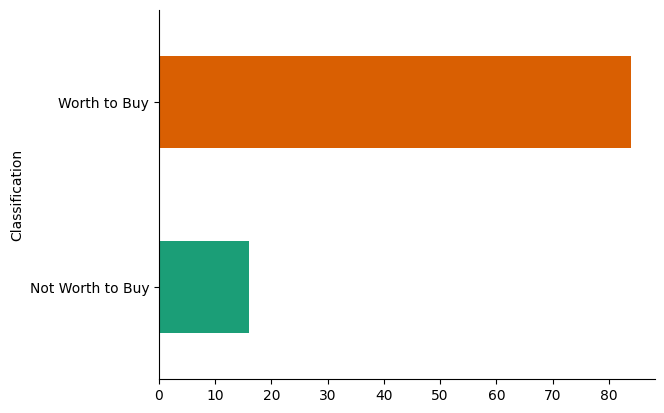

In [72]:
from matplotlib import pyplot as plt
import seaborn as sns
sample_df.groupby('Classification').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

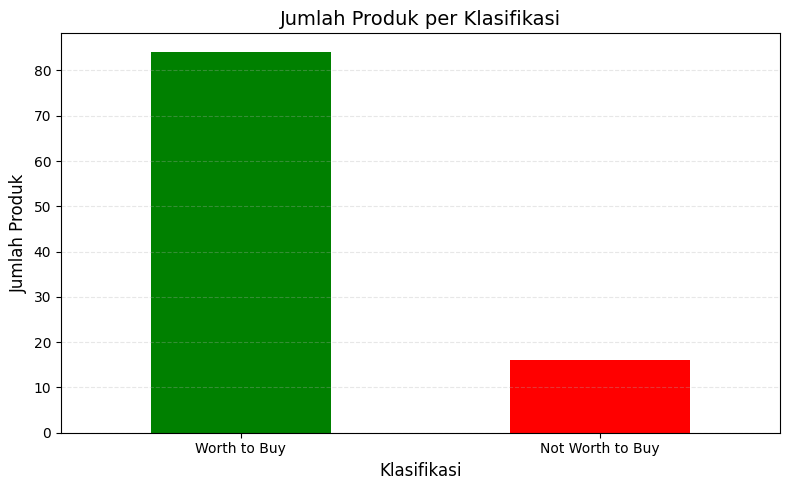

In [73]:
# Cek & filter data valid
sample_df = sample_df[sample_df['Classification'].isin(['Worth to Buy', 'Not Worth to Buy'])]

# Lanjut visualisasi jika tidak kosong
if not sample_df.empty:
    plt.figure(figsize=(8, 5))
    sample_df['Classification'].value_counts().plot(kind='bar', color=['green', 'red'])
    plt.title('Jumlah Produk per Klasifikasi', fontsize=14)
    plt.xlabel('Klasifikasi', fontsize=12)
    plt.ylabel('Jumlah Produk', fontsize=12)
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("❌ Tidak ada data valid untuk divisualisasikan.")


In [74]:
# Pastikan sample_df sudah ada dan berisi kolom 'product_name', 'actual_price', 'rating'

# Ambil 10 produk termurah
top10_price = sample_df[['product_name', 'actual_price']].dropna().sort_values('actual_price').head(10).copy()
top10_price['product_name'] = top10_price['product_name'].str.slice(0, 30)

# Ambil 10 produk dengan rating terendah
top10_rating = sample_df[['product_name', 'rating']].dropna().sort_values('rating').head(10).copy()
top10_rating['product_name'] = top10_rating['product_name'].str.slice(0, 30)

# Tampilkan hasil agar terbaca di output Google Colab
from IPython.display import display
print("🔹 Top 10 Produk Termurah:")
display(top10_price)

print("\n🔸 Top 10 Produk dengan Rating Terendah:")
display(top10_rating)


🔹 Top 10 Produk Termurah:


,product_name,actual_price
5,pTron Solero TB301 3A Type-C D,"₹1,000"
0,Wayona Nylon Braided USB to Li,"₹1,099"
80,Wayona Usb Nylon Braided Data,"₹1,099"
42,Wayona Nylon Braided 3A Lightn,"₹1,099"
32,Zoul USB C 60W Fast Charging 3,"₹1,099"
46,D-Link DWA-131 300 Mbps Wirele,"₹1,208"
84,Wayona Usb Type C Fast Charger,"₹1,299"
56,TP-LINK WiFi Dongle 300 Mbps M,"₹1,399"
65,Amazon Basics High-Speed HDMI,"₹1,400"
58,Wecool Unbreakable 3 in 1 Char,"₹1,499"



🔸 Top 10 Produk dengan Rating Terendah:


,product_name,rating
45,Wecool Nylon Braided Multifunc,3.3
82,SKYWALL 81.28 cm (32 inches) H,3.4
90,Gizga Essentials USB WiFi Adap,3.6
48,7SEVEN® Compatible for Samsung,3.6
21,tizum HDMI to VGA Adapter Cabl,3.7
97,"Gilary Multi Charging Cable, 3",3.7
95,ZEBRONICS ZEB-USB150WF1 WiFi U,3.7
60,Airtel DigitalTV DTH Televisio,3.7
55,Tata Sky Universal Remote,3.7
96,LOHAYA Remote Compatible for M,3.8


In [75]:
# prompt: Using dataframe top10_price: suggest a plot

import altair as alt

# Create a bar chart with 'product_name' on the x-axis and 'actual_price' on the y-axis.
# Encode 'actual_price' as a nominal variable to treat it as a category.
chart = alt.Chart(top10_price).mark_bar().encode(
    x=alt.X('product_name', title='Product Name'),  # Set x-axis label
    y=alt.Y('actual_price', title='Actual Price', type='nominal') # Set y-axis label and type
).properties(
    title='Actual Price for Each Product'  # Set the chart title
)

chart


alt.Chart(...)

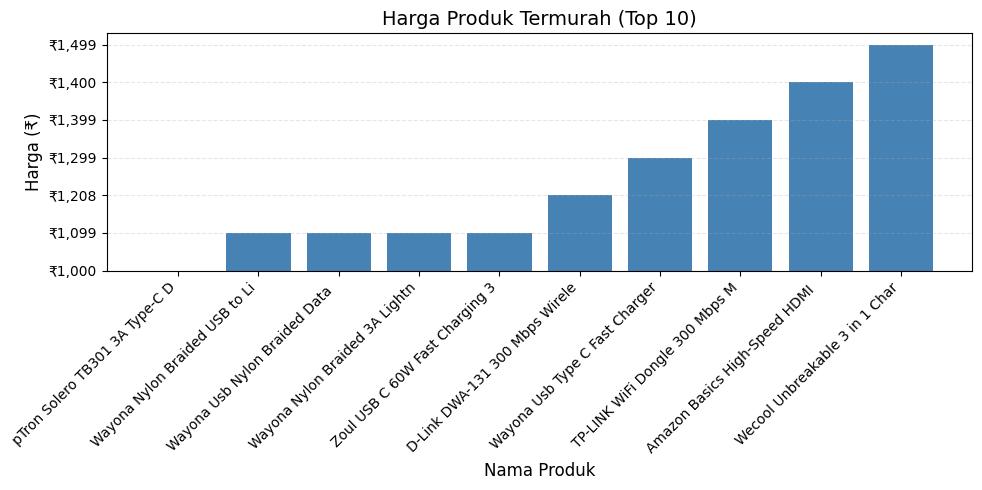

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
bars = plt.bar(top10_price['product_name'], top10_price['actual_price'], color='#4682B4')  # steel blue
plt.title('Harga Produk Termurah (Top 10)', fontsize=14)
plt.xlabel('Nama Produk', fontsize=12)
plt.ylabel('Harga (₹)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


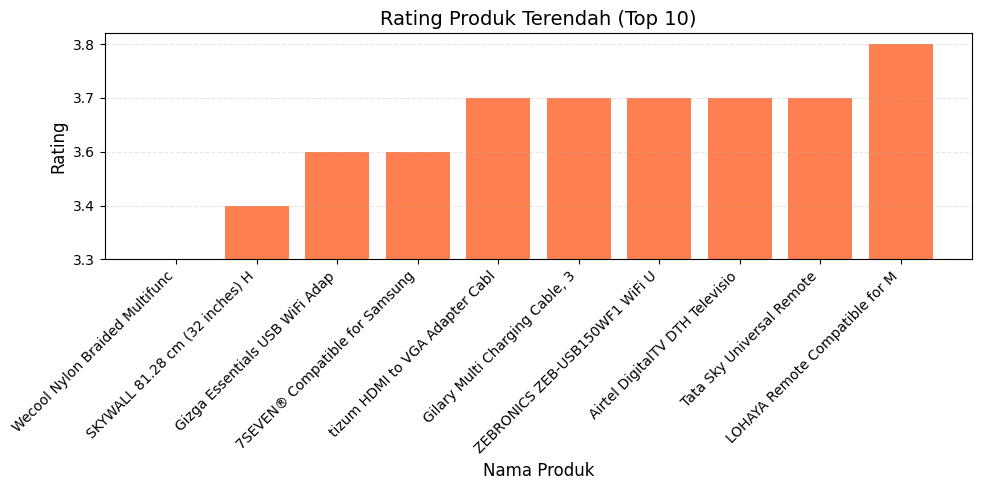

In [77]:
plt.figure(figsize=(10, 5))
bars = plt.bar(top10_rating['product_name'], top10_rating['rating'], color='#FF7F50') # coral
plt.title('Rating Produk Terendah (Top 10)', fontsize=14)
plt.xlabel('Nama Produk', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

🔹 Top 10 Produk dengan Rating Tertinggi:


,product_name,rating
174,Syncwire LTG to USB Cable for,5.0
324,REDTECH USB-C to Lightning Cab,5.0
775,Amazon Basics Wireless Mouse |,5.0
1299,"Instant Pot Air Fryer, Vortex",4.8
1201,Oratech Coffee Frother electri,4.8
1145,Swiffer Instant Electric Water,4.8
1223,FIGMENT Handheld Milk Frother,4.7
1226,Zuvexa USB Rechargeable Electr,4.7
1275,Multifunctional 2 in 1 Electri,4.7
459,Spigen EZ Fit Tempered Glass S,4.7



🔸 Top 10 Produk dengan Harga Tertinggi (Discounted Price):


,product_name,discounted_price
249,Sony Bravia 164 cm (65 inches),77990.0
325,OnePlus 163.8 cm (65 inches) U,61999.0
255,VU 164 cm (65 inches) The GloL,54990.0
192,Samsung 138 cm (55 inches) Cry,47990.0
283,LG 139 cm (55 inches) 4K Ultra,47990.0
332,MI 138.8 cm (55 inches) 5X Ser,46999.0
276,Samsung 138 cm (55 inches) Cry,45999.0
533,OnePlus 10T 5G (Moonstone Blac,44999.0
216,OnePlus 138.7 cm (55 inches) U,42999.0
1354,LG 1.5 Ton 5 Star AI DUAL Inve,42990.0


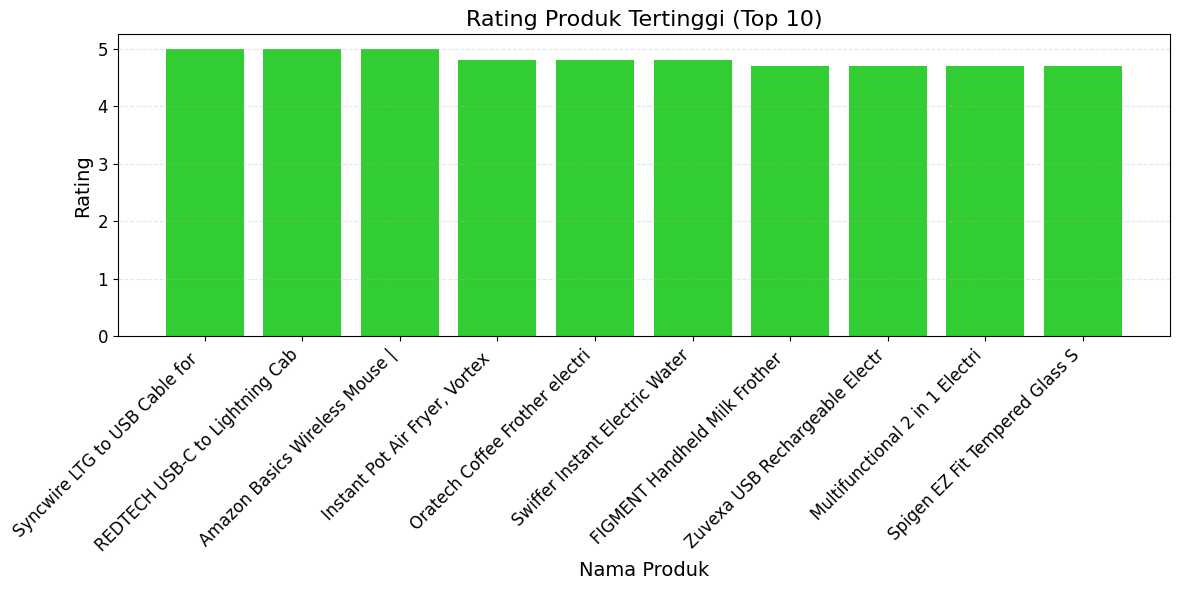

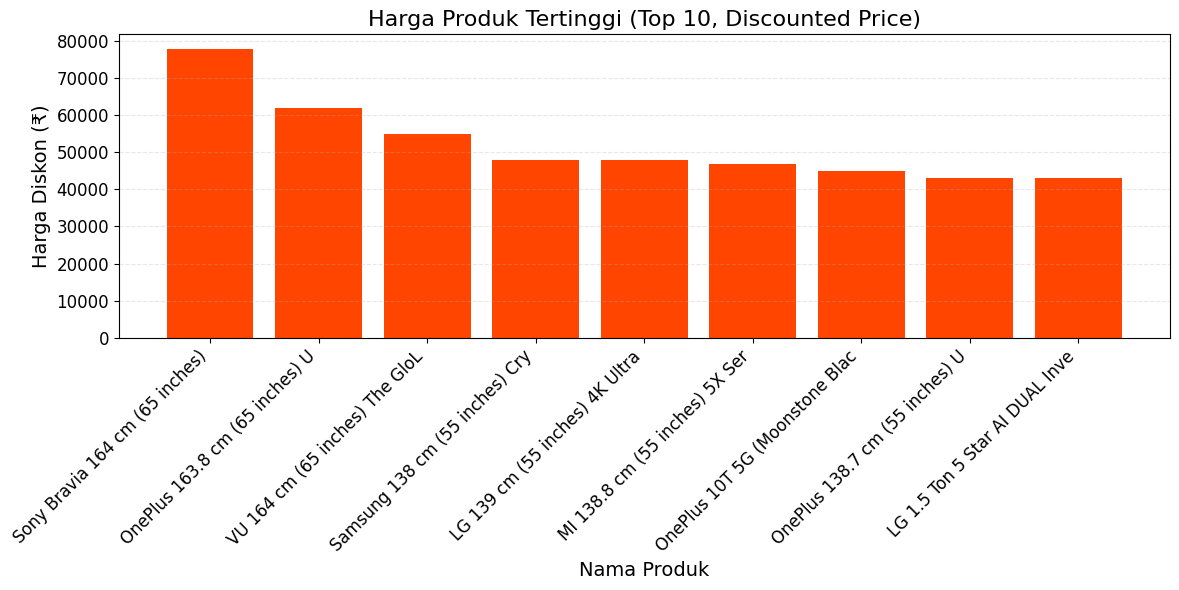

In [78]:
# prompt: lalu berikan rating produk tertinggi top 10 dan harga tertinggi top 10

import matplotlib.pyplot as plt
# lalu berikan rating produk tertinggi top 10 dan harga tertinggi top 10

# Ambil 10 produk dengan rating tertinggi
top10_rating_highest = df_clean[['product_name', 'rating']].sort_values('rating', ascending=False).head(10).copy()
top10_rating_highest['product_name'] = top10_rating_highest['product_name'].str.slice(0, 30)

# Ambil 10 produk dengan harga (discounted_price) tertinggi
top10_price_highest = df_clean[['product_name', 'discounted_price']].sort_values('discounted_price', ascending=False).head(10).copy()
top10_price_highest['product_name'] = top10_price_highest['product_name'].str.slice(0, 30)

# Tampilkan hasil
print("🔹 Top 10 Produk dengan Rating Tertinggi:")
display(top10_rating_highest)

print("\n🔸 Top 10 Produk dengan Harga Tertinggi (Discounted Price):")
display(top10_price_highest)

# Visualisasi Rating Tertinggi
plt.figure(figsize=(12, 6))
bars_rating = plt.bar(top10_rating_highest['product_name'], top10_rating_highest['rating'], color='#32CD32') # limegreen
plt.title('Rating Produk Tertinggi (Top 10)', fontsize=16)
plt.xlabel('Nama Produk', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Visualisasi Harga Tertinggi
plt.figure(figsize=(12, 6))
bars_price = plt.bar(top10_price_highest['product_name'], top10_price_highest['discounted_price'], color='#FF4500') # orangered
plt.title('Harga Produk Tertinggi (Top 10, Discounted Price)', fontsize=16)
plt.xlabel('Nama Produk', fontsize=14)
plt.ylabel('Harga Diskon (₹)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()